En esta libreta, veremos algunos algoritmos de ordenamiento.

Primero, importamos las librerías necesarias:


In [1]:
import numpy as np

Luego, generamos una lista de ejemplo:


In [2]:
L = np.random.randint(0, 10, 10)
print(L)

[1 3 3 5 8 0 2 5 7 9]


# Algoritmos


https://youtube.com/playlist?list=PLOmdoKois7_FK-ySGwHBkltzB11snW7KQ&si=rFTrOmy2dSNZ3rK6


## Insertion sort

Para cada elemento $X$ de la lista (excluyendo el primero), hacemos lo siguiente:

1. Lo comparamos con el elemento a su izquierda, llámese $L$.
2. Si $X < L$, intercambiamos $X$ y $L$.
3. Repetimos hasta que $L < X$, o lleguemos al principio de la lista.


In [3]:
def insertion_sort(a):
    for i in range(1, len(a)): #recorremos del segundo elemento al último 
        key = a[i] # elemento que quiero acomodar
        j = i - 1 # nos fijamos en el de la izquierda
        while j >= 0 and key < a[j]:
            a[j + 1] = a[j]
            j = j - 1 #nos movemos a la izquierda j -= 1
        a[j + 1] = key #ponemos al elemento en su lugar

In [4]:
temp = L.copy() # hacemos la copy para no ordenar el arreglo original
insertion_sort(temp)
print(temp)

[0 1 2 3 3 5 5 7 8 9]


- **Tiempo:** En el peor de los casos, el arreglo está ordenado al revés. Entonces, tendremos que comparar cada elemento con todos los elementos anteriores; en otras palabras, en la primera iteración haremos 1 comparación, luego 2, luego 3, y así hasta $n$. Por lo tanto, el número total de comparaciones es igual a la suma de los primeros $n$ naturales, que sabemos es de orden $O(n^2)$.

De manera implícita tenemos la suma de los primeros n números:

$$\frac{n(n+1)}{2} = \frac{n^2+n}{2}$$

- **Espacio:** Como solo maneja variables simples, la complejidad es $O(1)$. - sin considerar el arreglo

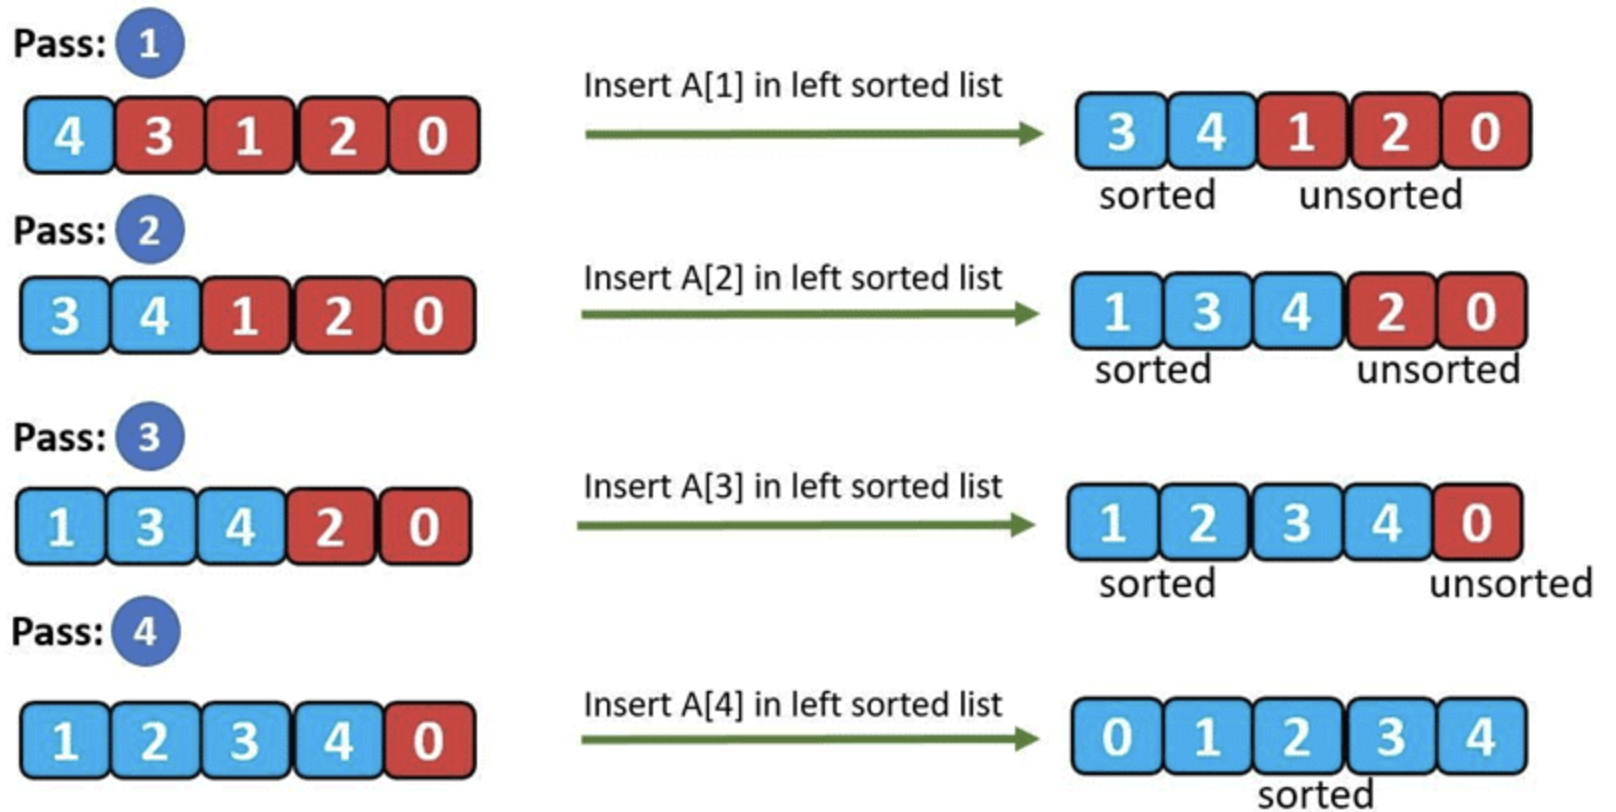


## Bubble sort

1. Recorremos el arreglo, comparando cada par de elementos.
2. Si un par no está ordenado, los intercambiamos.
3. Repetimos esto hasta llegar al final del arreglo.
4. Si hicimos al menos un intercambio (i.e., la lista no estaba ordenada), volvemos a empezar.


In [5]:
def bubble_sort(a):
    swapped = True
    while swapped:
        swapped = False
        for i in range(len(a)-1): #recorremos todo el arreglo
            if a[i] > a[i+1]: #comparamos
                a[i], a[i+1] = a[i+1], a[i]
                swapped = True #Si hicimos un intercambio

In [6]:
temp = L.copy()
bubble_sort(temp)
print(temp)

[0 1 2 3 3 5 5 7 8 9]


- **Tiempo:** Si el arreglo está ordenado al revés, en la primera iteración "llevaremos" el elemento más grande al último lugar. Después, en la siguiente iteración haremos lo mismo con el segundo más grande, y así sucesivamente. Entonces, la complejidad será de $O(n^2)$.
- **Espacio:** Como solo maneja variables simples, la complejidad es $O(1)$.

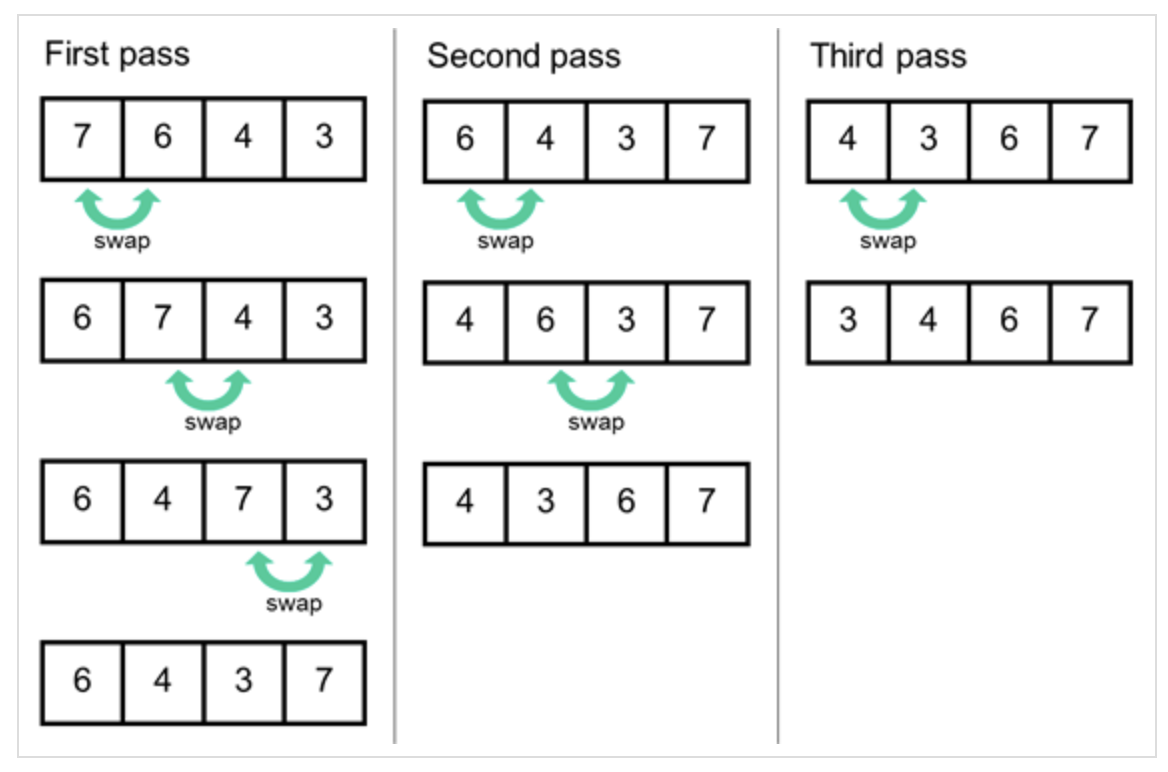

Podemos mejorar este algoritmo notando que, en la $n$-ésima iteración, estamos colocando el $n$-ésimo elemento más grande en su lugar final. Entonces, no tenemos que revisarlo en iteraciones subsecuentes:


In [7]:
def bubble_sort_optim(a):
    swapped = True
    n = len(a)
    while swapped:
        swapped = False
        for i in range(n-1):
            if a[i] > a[i+1]:
                a[i], a[i+1] = a[i+1], a[i]
                swapped = True
        n -= 1 #le descontamos los que ya están en su posición 

In [8]:
temp = L.copy()
bubble_sort_optim(temp)
print(temp)

[0 1 2 3 3 5 5 7 8 9]


Por desgracia, esto no cambia la complejidad en el peor de los casos.

Solo cambia la cota.


## Merge sort

1. Partimos la lista a la mitad, en parte izquierda (`L`) y derecha (`R`):
2. Ordenamos las dos partes de manera recursiva.
3. _Combinamos_ las partes ordenadas en la lista final.

El último paso lo logramos a través de la función `merge(L, R)`. Dadas las dos mitades de la lista, esta hace lo siguiente:

1. Inicializa una lista vacía `out`.
2. Compara el primer elemento de `L` con el primero de `R`, y añade el más pequeño a `out`.
3. Repite esto hasta que una de las listas esté vacía.
4. Añade todos los elementos restantes de la lista no vacía a `out`.


In [9]:
def merge_sort(a):
    if len(a) <= 1: #nos quedamos con listas de un elemento 
        return a
    
    mid = len(a) // 2 #partimos
    left = a[:mid]
    right = a[mid:]
    
    #paso recursivo
    left = merge_sort(left)
    right = merge_sort(right)
    return merge(left, right) #juntamos

#Hasta aquí todo cool, solo hicimos recursión dividiendo por la mitad
#La mágia es al momento de juntar las mitades

def merge(left, right):
    out = []
    while len(left) > 0 and len(right) > 0: 
        if left[0] <= right[0]: #verificamos el orden, cual agregar primero
            elem = left.pop(0)
            out.append(elem)
        else:
            elem = right.pop(0)
            out.append(elem)
    
    for elem in left: # una vez que pusimos lo que estaba fuera de lu ugar agregamos el resto
        out.append(elem)
    for elem in right:
        out.append(elem)
    return out

In [10]:
temp = list(L.copy())
temp = merge_sort(temp)
print(temp)

[np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(3), np.int32(5), np.int32(5), np.int32(7), np.int32(8), np.int32(9)]


**Tiempo**

Notemos que el tiempo de ejecución sigue la siguiente relación de recurrencia:

$$
T(n) = 2T\left(\frac{n}{2}\right) + n
$$

El primer término corresponde a ordenar las dos mitades de la lista de manera recursiva, mientras que el segundo es el ocupado por la función `merge`.

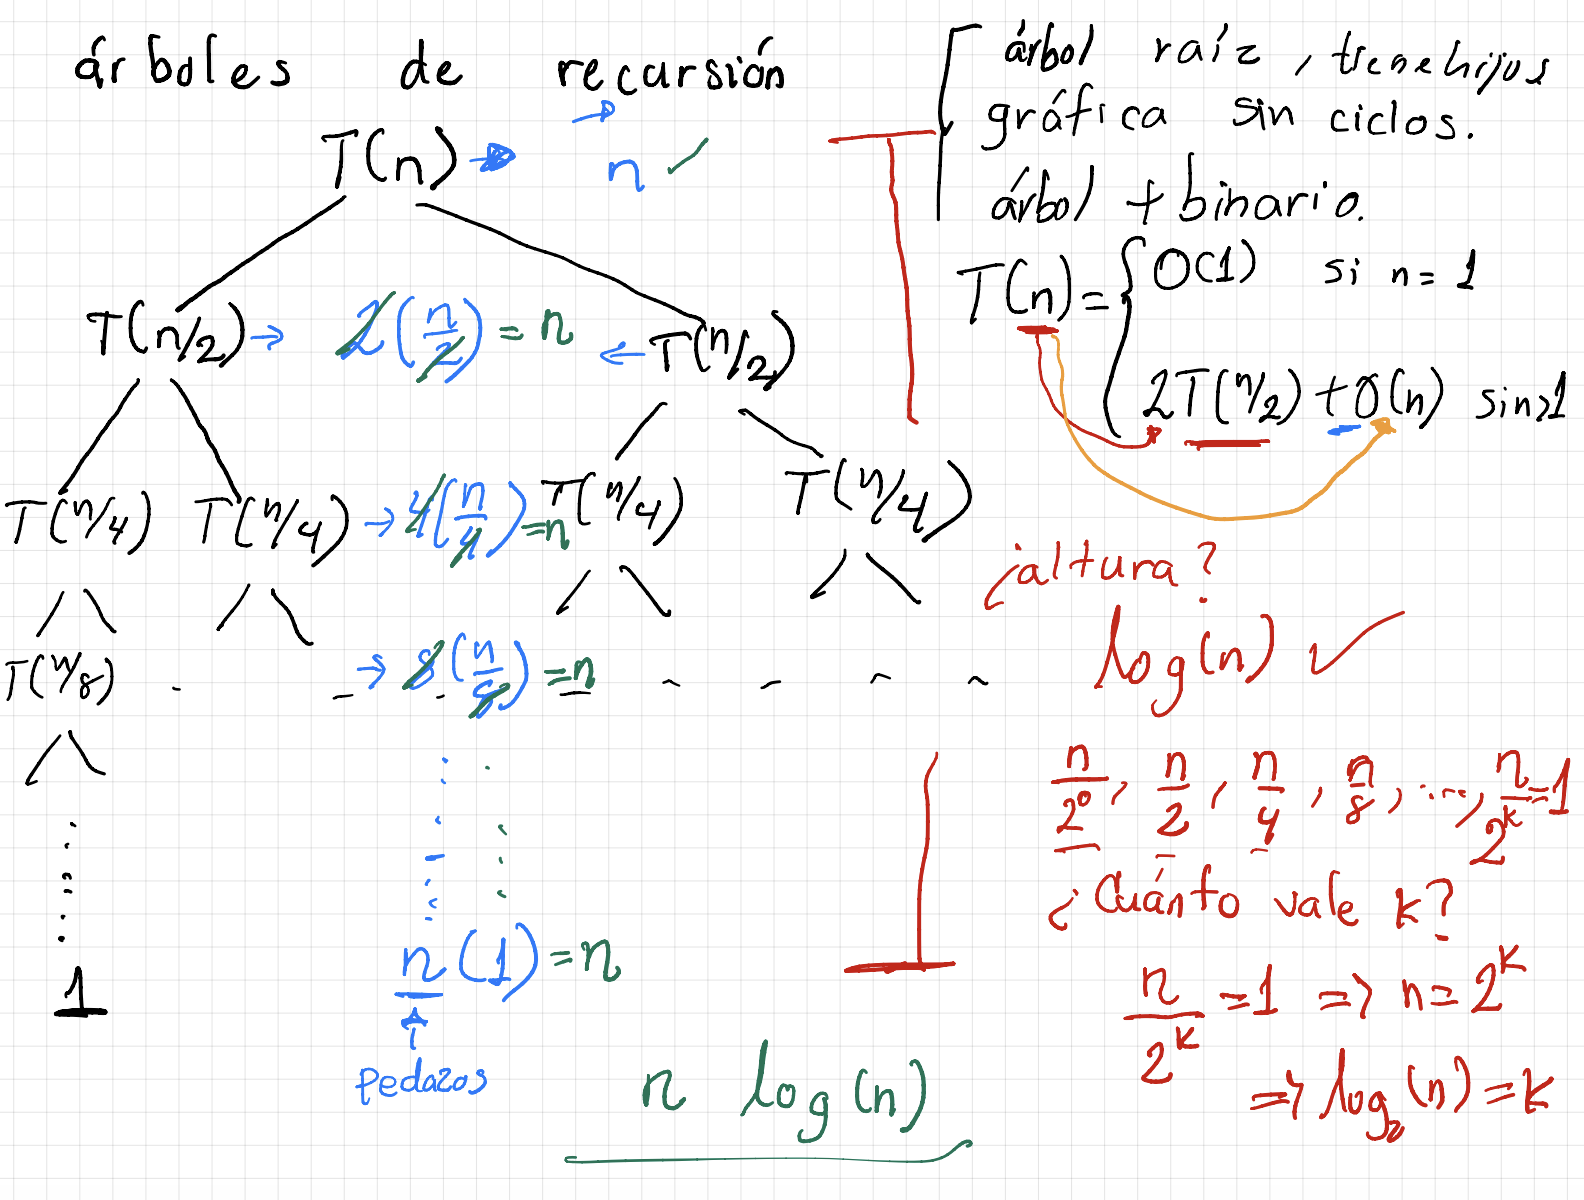

Podemos obtener una expresión cerrada utilizando el [teorema maestro](<https://en.wikipedia.org/wiki/Master_theorem_(analysis_of_algorithms)>). Primero, el exponente crítico es:

$$
c_\text{crit}=\log_2(2)=1
$$

Dado que $f(n) = n = \Theta(n^{c_\text{crit}}\log^k n)$, con $k=0$, concluimos que estamos en el caso 2 de la tabla. Por lo tanto:

$$
T(n) = \Theta(n\log n)
$$

**Espacio**

Dado que partimos la lista en 2 recursivamente hasta llegar a una lista con 1 o 0 elementos, el tamaño máximo de la pila de llamada será de $O(\log n)$. Por otro lado, en la función `merge` tenemos el arreglo `out` al cual vamos añadiendo los elementos ordenados. Al finalizar la ejecución, este tendrá tamaño $O(n)$.

Por lo tanto, la complejidad en espacio es $O(\log n) + O(n) \sim O(n)$.


## Counting sort

TENEMOS INFO EXTRA

1. Calculamos el máximo y mínimo del arreglo (`max` y `min`). Para nuestro arreglo de ejemplo, `min=2` y `max=9`.
2. Generamos un arreglo auxiliar `counts` de tamaño `max - min + 1`. La `i`-ésima entrada corresponde a cuántas veces está el elemento `i + min` en el arreglo a ordenar.

En nuestro ejemplo, este arreglo se ve de la siguiente forma:

```
counts = [2, 0, 2, 1, 3, 0, 1, 1]
```

Es decir, el `2` aparece 2 veces, el `3` 0 veces, etc.

3. Sumamos el elemento `i` del arreglo `counts` con el `i+1`, y lo guardamos en la posición `i`. Después de hacer esto para cada par de elementos, la entrada `i` nos dice _hasta dónde llegan_ el elemento `i + min` de la lista a ordenar.

Aplicándolo a nuestro ejemplo:

```
counts = [2, 2, 4, 5, 8, 8, 9, 10]
```

- La primera entrada nos dice que el elemento `2` de la lista va en las posiciones 0 y 1 de la lista ordenada.
- La segunda entrada nos dice que el elemento `3` no va en ninguna posición.
- La tercera nos dice que el elemento `4` va en las posiciones 3 y 4.
- Luego, el elemento `5` van en la posición 5.
- Etcétera


In [11]:
def counting_sort(a):
    min_ = min(a)
    max_ = max(a)
    k = max_ - min_ + 1
    #creamos nuestros arreglos 
    count = [0] * k #para la cuenta
    out = [None] * len(a) #final
    
    for i in range(len(a)): #contamos
        key = a[i] - min_
        count[key] += 1
    
    acc = count.copy() #le agregué esta línea

    for i in range(1, k): #para saber cuales se repiten
        count[i] += count[i-1]
   
    for i in range(len(a)-1, -1, -1): #Recrear la lista
        key = a[i] - min_
        count[key] -= 1
        out[count[key]] = a[i]
    
    return acc, count, out

In [12]:
temp = L.copy()
acc, count, temp = counting_sort(temp)
print(acc)
print(count)
print(temp)

[1, 1, 1, 2, 0, 2, 0, 1, 1, 1]
[0, 1, 2, 3, 5, 5, 7, 7, 8, 9]
[np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(3), np.int32(5), np.int32(5), np.int32(7), np.int32(8), np.int32(9)]


- **Tiempo:** Analizando los bucles _for_, vemos que la complejidad es $O(n) + O(k) + O(n) \sim O(k+n)$
- **Espacio:** Dado que la lista `count` tiene tamaño $k$, y la lista `out` $n$, se concluye que la complejidad es $O(k+n)$.


# Tries


Un trie es una estructura de datos basada en árboles que se utiliza para encontrar _strings_ específicos en un conjunto.

Por ejemplo, si tenemos la lista de palabras: `toro, tino, agua, asa, asta, vara`, el trie correspondiente se estructura de la siguiente manera:

```
                         ____ RAÍZ ____
                       /         |       \
                      A          T        V
                    /   \       / \       |
                   G     S     O   I      A
                   |    / \    |   |      |
                   U   A   T   R   N      R
                   |       |   |   |      |
                   A       A   O   O      A

```

Cada caracter tiene como hijos a todos los posibles caracteres subsecuentes que aparecen en el conjunto.

A continuación, creamos una clase que represente a uno de los nodos de esta estructura de datos; tiene muchas similitudes con la clase de árboles de búsqueda binarios vista en la clase pasada:


Si les interesa cosas de PLN

https://www.instagram.com/giil_unam?utm_source=ig_web_button_share_sheet&igsh=ZDNlZDc0MzIxNw==

https://puedjs.unam.mx/tlatelolcolab/


Esta clase tiene dos atributos:

- `key`: La llave (caracter) correspondiente al nodo.
- `children`: Todos los hijos del nodo, al inicio vacío.

Nótese que este último atributo es un diccionario; las llaves serán los atributos `key` de cada uno de los hijos, mientras que los valores serán los hijos correspondientes. Además, explotamos el _dunder_ `__getitem__` para poder accesar los hijos del nodo de una manera más compacta.


## Inserción

Para insertar una palabra al trie, vamos iterando letra por letra. En cada iteración, revisamos si el nodo en el que estamos parados actualmente tiene un hijo con la letra actual; si sí, simplemente pasamos a dicho hijo y a la siguiente letra de la palabra. En caso contrario, creamos un nodo, nos movemos a él, y pasamos a la siguiente letra:


In [13]:
class TrieNode:
    def __init__(self, key=None):
        self.key = key
        self.children = {}

    def __repr__(self): #mostrarlo de una manera linda
        return f"Llave: {self.key}\nHijos: {list(self.children.keys())}"
    
    def __getitem__(self, key):
        assert isinstance(key, str) #verificamos 
        
        if len(key) == 1:
            return self.children[key]
        else:
            return self.children[key[0]][key[1:]] #obtener al hijo recursivo
        
    def insert(self, word):
        current = self
        for c in word:
            if c not in current.children:
                current.children[c] = TrieNode(c)
            current = current.children[c]

In [14]:
root = TrieNode()
root.insert("hola")

In [15]:
root.__getitem__('h')

Llave: h
Hijos: ['o']

In [16]:
root['h']

Llave: h
Hijos: ['o']

In [17]:
root.__getitem__('hol')

Llave: l
Hijos: ['a']

In [18]:
root['hol']

Llave: l
Hijos: ['a']

## Búsqueda

Para determinar si un _string_ está contenido en un trie, basta con iterar sobre cada uno de sus caracteres, e ir recorriendo el trie a la par. Si en algún momento intentamos desplazarnos a un nodo que no existe, significa que la palabra no está en el trie:


In [19]:
class TrieNode:
    def __init__(self, key=None):
        self.key = key
        self.children = {}

    def __repr__(self):
        return f"Llave: {self.key}\nHijos: {list(self.children.keys())}"
    
    def __getitem__(self, key):
        assert isinstance(key, str)
        
        if len(key) == 1:
            return self.children[key]
        else:
            return self.children[key[0]][key[1:]]


    def insert(self, word):
        current = self
        for c in word:
            if c not in current.children:
                current.children[c] = TrieNode(c)
            current = current.children[c]

    def search(self, word):
        current = self
        for c in word: #para cada caracter de la palabra
            if c not in current.children: #vemos si está en sus hijos
                return False
            current = current.children[c] #nos movemos de caracter
        return True

In [20]:
root = TrieNode()
#Construir el árbol y buscar
root.insert("hola")
root.insert("hoja")
root.insert("papa")
root.insert("piedra")
root.insert("papel")

In [21]:
root.search("ha")

False

## Borrado

La manera más sencilla y eficiente de borrar una palabra es introduciendo un atributo `parent`, que apunte al padre del nodo actual. De esta manera, una vez que hayamos determinado que la palabra se encuentra en el trie, solo necesitamos ir subiendo, borrando todos los nodos que tengan un solo hijo, y parando cuando encontremos uno que tiene dos o más.

Naturalmente, modificamos la función de inserción para que actualice de manera correcta el campo de `parent`:


Algunos casos:

1. La palabra no está = no hacemos nada
2. La palabra no comparte una clave con otras palabras Ej: hola y cel
3. Que sea comparta prefijo Ej: hola- holograma


In [22]:
class TrieNode:
    def __init__(self, key=None, parent=None):
        self.key = key
        self.children = {}
        self.parent = parent #agregamos

    def __repr__(self):
        parent_key = None if self.parent is None else self.parent.key
        return f"Llave: {self.key}\nPadre: {parent_key}\nHijos: {list(self.children.keys())}" #modificamos
    
    def __getitem__(self, key):
        assert isinstance(key, str)
        
        if len(key) == 1:
            return self.children[key]
        else:
            return self.children[key[0]][key[1:]]

    def insert(self, word):
        current = self
        for c in word:
            if c not in current.children:
                current.children[c] = TrieNode(key=c, parent=current) #modificamos
            current = current.children[c]

    def search(self, word): #se queda igual
        current = self
        for c in word:
            if c not in current.children:
                return False
            current = current.children[c]
        return True
    
    def delete(self, word):
        #--- se parece a la función de arriba
        current = self
        for c in word:
            if c not in current.children:
                return #Si no está no hacemos nada
            current = current.children[c] #encontramos el final de la palabra
        
        num_deleted = 0
        while len(current.parent.children) == 1: #seguimos subiendo mientra solo exista un hijo
            current = current.parent
            current.children = {}
            num_deleted += 1 #para saber cuantos eliminar
        
        final_letter = word[-num_deleted - 1] #quitamos el númeor de hijos que sobra
        #aquí utilizamos el método __getitem__ 
        del current.parent.children[final_letter] #borramos

In [23]:
root = TrieNode()
root.insert("hola")
root.insert("hoja")
root.insert("papa")
root.insert("piedra")
root.insert("papel")

root.delete("hola")

In [24]:
root.search('hola')

False

In [25]:
root.search('hol')

False

In [26]:
root.search('ho')

True

# Ejercicios


## 1

Para un arreglo $A$, decimos que ocurre un _volteo_ si para un par de índices $i, j$ con $i<j$, ocurre que $A[i] > A[j]$.

Escribe un algoritmo que cuente el número de volteos. Debe de tener complejidad en tiempo $O(n\log n)$, donde $n$ es el número de elementos del arreglo. Calcula su complejidad en espacio.


***Explicación:***

Notamos del algoritmo de Merge Sort que, durante el proceso de ordenamiento, cuando se están combinando dos mitades del arreglo ordenadas, podemos identificar los "volteos".

La idea para hacer esto es la siguiente:

Sabemos que Merge Sort divide el arreglo en dos mitades; si, mientras combinamos dos particiones ordenadas, encontramos que un elemento en la mitad derecha es menor que un elemento de la mitad izquierda, entonces todos los elementos restantes en la mitad izquierda conforman un "volteo" con este elemento de la derecha, porque cada uno de esos elementos es mayor y aparece antes en el arreglo.

El algortimo se describe entonces como:
1. Divide el arreglo en dos mitades recursivamente.
2. Combina dos subarreglos ordenados y cuenta los volteos. Si un elemento en el subarreglo izquierdo es mayor que uno en el derecho, entonces todos los elementos restantes en el izquierdo forman un volteo con ese elemento del derecho.

La complejidad temporal del algoritmo de conteo de volteos, basado en Merge Sort, es $O(nlogn)$, de acuerdo con el Teorema Maestro, dado que tenemos.

- $a = 2$: Porque se divide el problema en 2 subproblemas.
- $b = 2$: Porque el tamaño de cada subproblema es la mitad del original.
- $c = 1$ Porque el costo de combinar las mitades y contar los volteos es lineal $O(n)$

Lo cual corresponde al caso 2 del Teorema maestro.

(El análisis es análogo al Merge Sort "original").


In [27]:
# Recursive function that applies the merge sort algorithm and counts inversions
def merge_sort_and_count(A):
    # Base case: an array of a single element has no inversions
    if len(A) <= 1:
        return A, 0
    # Split the array into two halves
    mid = len(A) // 2
    left, left_inversions = merge_sort_and_count(A[:mid])
    right, right_inversions = merge_sort_and_count(A[mid:])
    # Combine the halves and count the inversions during the combination
    merged, merge_inversions = merge_and_count(left, right)
    # The total number of inversions is the sum of the inversions in the halves and during the merge
    total_inversions = left_inversions + right_inversions + merge_inversions
    return merged, total_inversions

# Auxiliary function that merges and counts inversions
def merge_and_count(left, right):
    i = j = 0
    merged = []
    inversions = 0
    # Merge the two sorted subarrays
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1
            # If left[i] > right[j], there are (len(left) - i) inversions
            inversions += len(left) - i
    # Add the remaining elements
    merged.extend(left[i:])
    merged.extend(right[j:])
    return merged, inversions

# Driver function
def count_inversions(A):
    # Start the merge sort process and return only the total number of inversions
    _, total_volteos = merge_sort_and_count(A)
    return total_volteos

Test cases


In [28]:
A = np.random.randint(0, 5, 5)
print(A)
print(count_inversions(A))

[1 3 1 4 0]
5


In [29]:
A = np.random.randint(-3, 3, 6)
print(A)
print(count_inversions(A))

[ 2  2  1  2 -1  1]
9


## 2

Dado un arreglo $A$ de números enteros, y un entero $k>0$, escribe un algoritmo que regrese todos los pares $(a,b)$ con $a,b\in A$ que cumplen $a-b=k$. Este debe de correr en tiempo lineal, y el resultado no debe de tener pares repetidos.


**_Explicación:_**

Para diseñar un algoritmo con complejidad temporal lineal, debemos encontrar una manera de resolver el problema con un solo barrido a la lista $A$. Podemos notar lo siguiente:

- Si $a-b=k$, entonces $a-k=b$, esto es, un elemento $a$ de la lista $A$ menos el parámetro $k$ es igual a otro elemento $b$ de $A$.

Podemos aprovechar esto para recorrer la lista una vez, e ir verificando si el elemento $b$ de cada elemento $a$ (es decir, el valor $b$ que falta para que la diferencia $a-k$ sea $b$) se encuentra en la lista.

También debemos considerar el caso en el que $b-a=k$, en este caso, también revisamos para cada valor $a$, si su complemento ($b$ tal que $a+k=b$) está en la lista.

Entonces, usamos un conjunto $S$ para almacenar los elementos vistos hasta el momento.

Luego, para cada número $a$ en $A$, verificamos si $a−k$ o $a+k$ ya están en $S$, lo que indicaría que hay un par $(a,a−k)$ o $(a+k,a)$ que cumple la condición.

Los pares se almacenan en un conjunto para evitar duplicados.

Al final, convertimos el conjunto de pares en una lista para devolver el resultado.

El algoritmo funciona de la siguiente manera:

1. Inicializa un conjunto vacío S para almacenar los elementos del arreglo.
2. Recorre cada elemento a en el arreglo A:
   - Verifica si a−k está en S, en cuyo caso el par (a,a−k) es una solución.
   - Verifica si a+k está en S, en cuyo caso el par (a+k,a) es una solución.
3. Inserta el elemento a en el conjunto S.
4. Devuelve todos los pares encontrados.

La complejidad temporal es $O(n)$, ya que recorremos el arreglo $A$ una sola vez, y todas las operaciones sobre el conjunto tienen un costo promedio constante.


In [30]:
def diff_is_k(A, k):
    # Set to store the elements of the array
    S = set()
    # List to store the pairs that satisfy the condition
    pairs = set()
    # Run through the elements of A
    for a in A:
        # Verify if there is a b such that a - b = k
        if a - k in S:
            pairs.add((a, a - k))
        # Verify if there is a b such that b - a = k
        if a + k in S:
            pairs.add((a + k, a))
        # Add the current element to the set
        S.add(a)
    return list(pairs)

Test cases


In [31]:
A = np.random.randint(0, 10, 10)
print(A)
k = 2
print(diff_is_k(A, k))

[2 9 0 6 7 3 0 6 2 0]
[(np.int32(9), np.int32(7)), (np.int32(2), np.int32(0))]


In [32]:
# Including negative numbers
A = np.random.randint(-10, 10, 20)
print(A)
k = 5
print(diff_is_k(A, k))

[ 4  7 -5  0  6  1 -2 -6  2 -5  4  3  3  2  7 -7 -1  3 -7 -7]
[(np.int32(3), np.int32(-2)), (np.int32(6), np.int32(1)), (np.int32(4), np.int32(-1)), (np.int32(-1), np.int32(-6)), (np.int32(-2), np.int32(-7)), (np.int32(7), np.int32(2)), (np.int32(0), np.int32(-5))]


## 3

Dado un arreglo $A$, escribe un algoritmo que determine la tupla $(a, b, c)$ con $a, b, c\in A$ tal que el producto $a\cdot b\cdot c$ es máximo. Este debe de correr en tiempo lineal.


**_Explicación:_**

Notamos que el producto más grande posible con tres números es el mayor de los siguientes casos:

1. Producto de los 3 números positivos más grandes.
2. Producto del número positivo más grande y los dos negativos más pequeños (los más negativos).

Al igual que en el ejercicio anterior, debemos pensar en un algoritmo que pase por los elementos de la lista una sola vez para tener complejidad temporal lineal.

Esto puede resolverse si recorremos cada elemento de la lista, actualindo los 3 mayores y los 2 más negativos en cada paso, y al final devolver el mayor de los dos casos que se presentan.

El algoritmo se describe de la siguiente manera:

1. Definimos variables `max1`, `max2`, `max3` (los números más grandes), `min1` y `min2` (los números menores).
2. A medida que recorremos el arreglo, actualizamos las variables para tres números más grandes y los dos más pequeños.
3. - Calculamos el producto de los tres números más grandes.
   - Calculamos el producto de los dos números más pequeños y el número más grande.
4. Se retorna el mayor de los productos.

La complejidad temporal es $O(n)$, ya que recorremos el arreglo $A$ una sola vez, y las operaciones para encontrar los mayores y menores son constantes.


In [33]:
def max_product(A):
    # Initialize the maximum three and the two minimums
    max1 = max2 = max3 = float('-inf')
    min1 = min2 = float('inf')
    # Traverse the array once
    for num in A:
        # Update the three maximums
        if num > max1:
            max3 = max2
            max2 = max1
            max1 = num
        elif num > max2:
            max3 = max2
            max2 = num
        elif num > max3:
            max3 = num
        # Update the two minimums
        if num < min1:
            min2 = min1
            min1 = num
        elif num < min2:
            min2 = num
    # Calculate the two possible products
    p1 = max1 * max2 * max3  # Product of three maximums
    p2 = max1 * min1 * min2  # Product of two minimums and the maximum
    # Return the maximum of the two products
    return max(p1, p2)

Test cases


In [34]:
A = np.random.randint(0, 10, 10)
print(A)
print(max_product(A))

[5 9 8 0 1 2 2 2 7 5]
504


In [35]:
A = np.random.randint(-10, 10, 20)
print(A)
print(max_product(A))

[-10  -2  -8   9  -1   1  -9   5  -5  -5   9   5  -7   8   3  -1   5  -2
 -10   7]
900
